<a href="https://colab.research.google.com/github/Gur07/fruitClassification/blob/main/M3_v2(feature_extraction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

Dataset URL: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
License(s): unknown
100% 3.58G/3.58G [02:53<00:00, 22.1MB/s]
100% 3.58G/3.58G [02:53<00:00, 22.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fruits-fresh-and-rotten-for-classification.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten, Activation,Dropout,Rescaling
from keras.applications.vgg16 import VGG16

In [ ]:
import os
new_dir_path = '/content/filtered_apple_images/test'
os.makedirs(new_dir_path, exist_ok=True)
print(f"Directory '{new_dir_path}' created successfully")

Directory '/content/filtered_apple_images/test' created successfully


#Model

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_2 = Sequential()

model_2.add(conv_base)
model_2.add(Flatten())
model_2.add(Dense(256,activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))


In [ ]:
conv_base.trainable = False

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/filtered_apple_images/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/filtered_apple_images/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 4035 files belonging to 2 classes.
Found 996 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model_2.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step - accuracy: 0.9790 - loss: 0.1572 - val_accuracy: 0.9669 - val_loss: 0.1720
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.9532 - loss: 0.2226 - val_accuracy: 0.9829 - val_loss: 0.1559
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.9643 - loss: 0.1782 - val_accuracy: 0.8454 - val_loss: 0.4376
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 20s 138ms/step - accuracy: 0.9180 - loss: 0.3373 - val_accuracy: 0.9809 - val_loss: 0.1410
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step - accuracy: 0.9795 - loss: 0.1449 - val_accuracy: 0.9789 - val_loss: 0.1345
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.9771 - loss: 0.1426 - val_accuracy: 0.9799 - val_loss: 0.1328
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 23s 140ms/step - accuracy: 0.9764 - loss: 0.1425 - val_accuracy: 0.9749 - val_loss: 0.1411
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.9785 - loss: 0

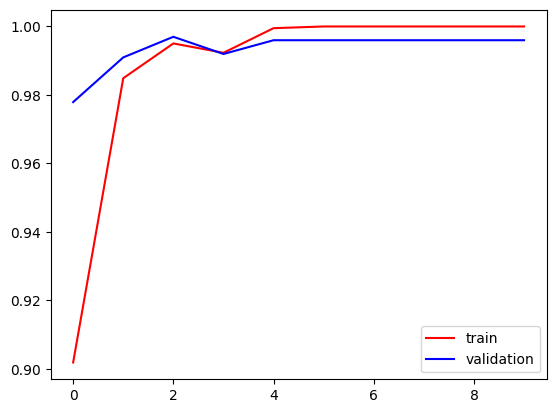

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

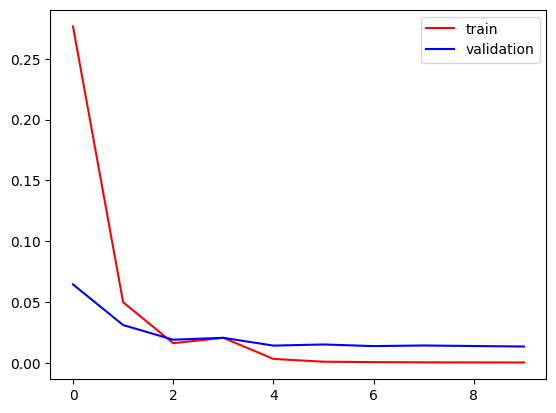

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# ResNet-50

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
base = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3)
)

In [ ]:
base.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_301 (Conv2D)       │ (None, 74, 74, 32)     │            864 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_301   │ (None, 74, 74, 32)     │             96 │ conv2d_301[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_297            │ (None, 74, 74, 32)     │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_302 (Conv2D)       │ (None, 72, 72, 32)     │          9,216 │ activation_297[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_302   │ (None, 72, 72, 32)     │             96 │ conv2d_302[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_298            │ (None, 72, 72, 32)     │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_303 (Conv2D)       │ (None, 72, 72, 64)     │         18,432 │ activation_298[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_303   │ (None, 72, 72, 64)     │            192 │ conv2d_303[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_299            │ (None, 72, 72, 64)     │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 35, 35, 64)     │              0 │ activation_299[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_304 (Conv2D)       │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_304   │ (None, 35, 35, 80)     │            240 │ conv2d_304[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_300            │ (None, 35, 35, 80)     │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_305 (Conv2D)  

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
model_3 = Sequential()

model_3.add(base)
model_3.add(Flatten())
model_3.add(Dense(256,activation='relu'))
model_3.add(Dropout(0.4))
model_3.add(Dense(1,activation='sigmoid'))

In [ ]:
base.trainable = False

In [ ]:
model_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model_3.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 233ms/step - accuracy: 0.8474 - loss: 4.6523 - val_accuracy: 0.9709 - val_loss: 0.1780
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 26s 155ms/step - accuracy: 0.9807 - loss: 0.0699 - val_accuracy: 0.9829 - val_loss: 0.0561
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 18s 138ms/step - accuracy: 0.9890 - loss: 0.0278 - val_accuracy: 0.9940 - val_loss: 0.0151
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - accuracy: 0.9942 - loss: 0.0156 - val_accuracy: 0.9960 - val_loss: 0.0124
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - accuracy: 0.9958 - loss: 0.0110 - val_accuracy: 0.9829 - val_loss: 0.0545
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - accuracy: 0.9955 - loss: 0.0133 - val_accuracy: 0.9970 - val_loss: 0.0070
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 19s 148ms/step - accuracy: 0.9974 - loss: 0.0132 - val_accuracy: 0.9990 - val_loss: 0.0043
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 19s 138ms/step - accuracy: 0.9913 - loss: 0